In [3]:
import pandas as pd
import sweetviz as sv

In [4]:
fileName = '../data/raw/combined_study_clinical_data2.tsv'
df = pd.read_csv(fileName, sep='\t')


In [5]:
df.sample(5).T

,6891,7807,9385,4311,2893
Study ID,msk_impact_2017,msk_impact_2017,msk_impact_2017,msk_impact_2017,msk_impact_2017
Patient ID,P-0006888,P-0007998,P-0009935,P-0004286,P-0002886
Sample ID,P-0006888-T01-IM5,P-0007998-T02-IM5,P-0009935-T01-IM5,P-0004286-T01-IM5,P-0002886-T01-IM3
Diagnosis Age,NaN,NaN,NaN,NaN,NaN
AGENT,NaN,NaN,NaN,NaN,NaN
Alcohol Consumption Frequency,NaN,NaN,NaN,NaN,NaN
Alcohol History Documented,NaN,NaN,NaN,NaN,NaN
Cancer Type,Colorectal Cancer,Colorectal Cancer,Non-Small Cell Lung Cancer,Breast Cancer,Non-Small Cell Lung Cancer
Cancer Type Detailed,Colon Adenocarcinoma,Colon Adenocarcinoma,Lung Squamous Cell Carcinoma,Breast Invasive Ductal Carcinoma,Lung Adenocarcinoma
Clinical Trial,NaN,NaN,NaN,NaN,NaN


In [6]:
# select only the columns with more than the 90% of the rows with data
df_des = df.describe(include='all').T
pop90 = round(df.shape[0]*.9)
cols = list(df_des[df_des['count']>pop90].index)
cols

['Study ID',
 'Patient ID',
 'Sample ID',
 'Cancer Type',
 'Cancer Type Detailed',
 'Fraction Genome Altered',
 'Mutation Count',
 'Oncotree Code',
 'Overall Survival Status',
 'Primary Tumor Site',
 'Sample Class',
 'Number of Samples Per Patient',
 'Sample coverage',
 'Sample Type',
 'Sex',
 'Smoking History',
 'Somatic Status',
 'TMB (nonsynonymous)',
 'Tumor Purity',
 "Patient's Vital Status",
 'DNA Input',
 'Matched Status',
 'Sample Collection Source',
 'Specimen Preservation Type',
 'Specimen Type']

In [7]:
report = sv.analyze(df[cols])

/home/boris/anaconda3/lib/python3.8/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/boris/anaconda3/lib/python3.8/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/home/boris/anaconda3/lib/python3.8/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/boris/anaconda3/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/boris/anaconda3/lib/python3.8/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/boris/anaconda3/lib/python3.8/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/home/bo


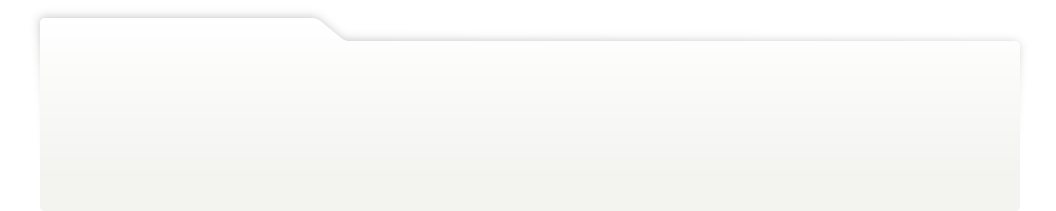
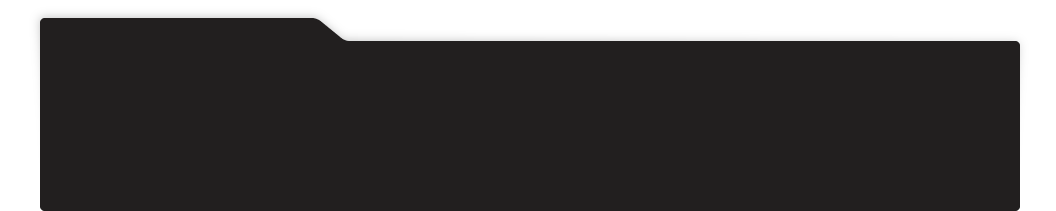
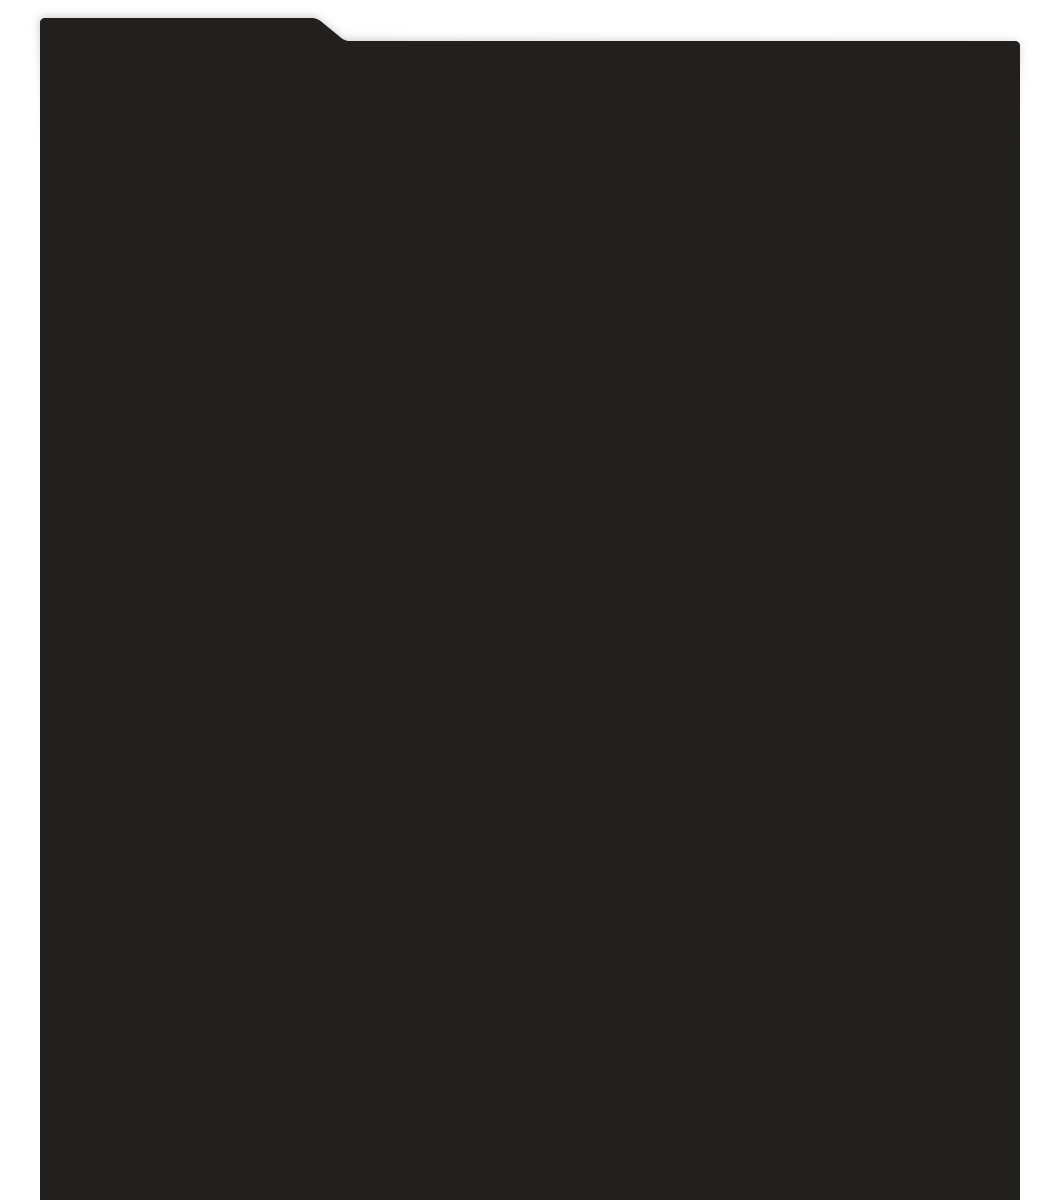
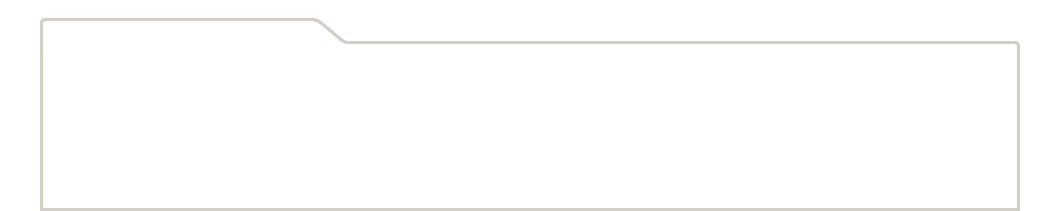
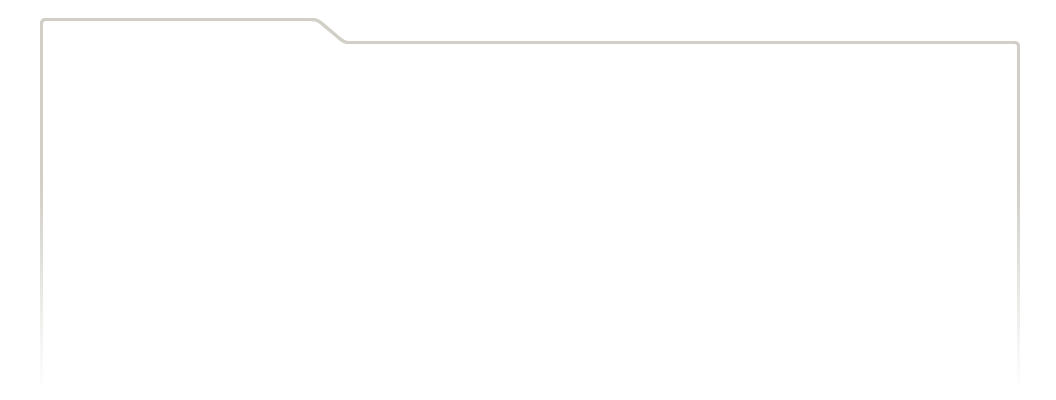
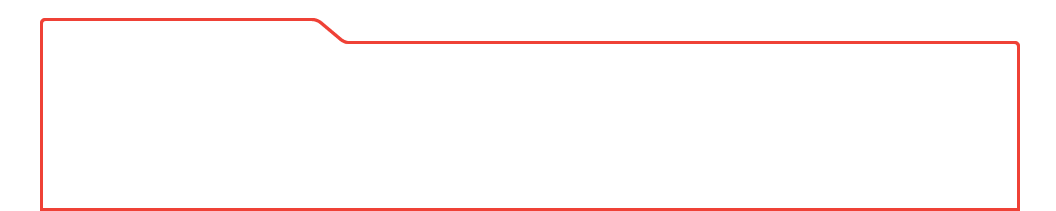
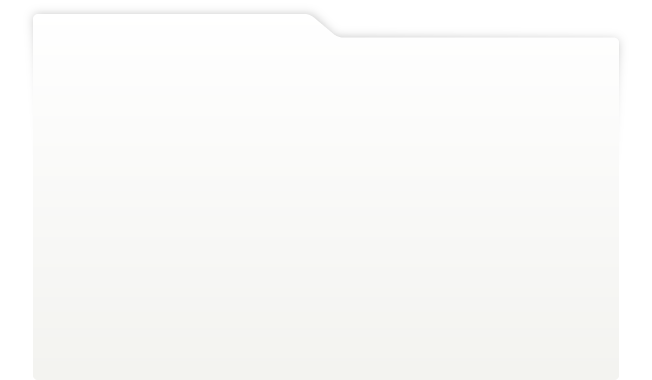
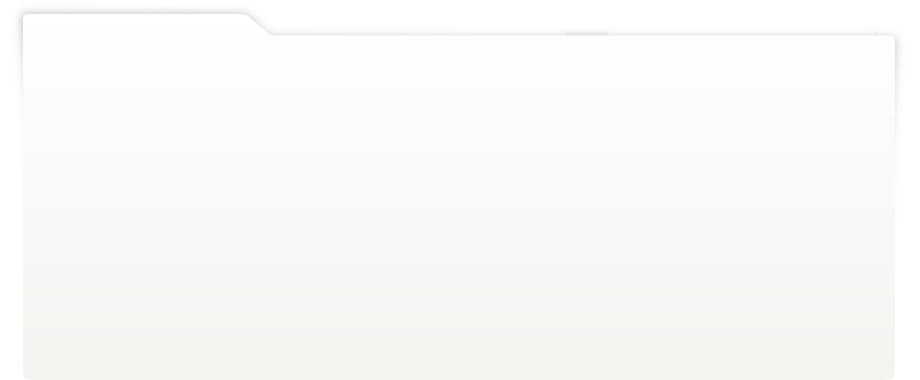
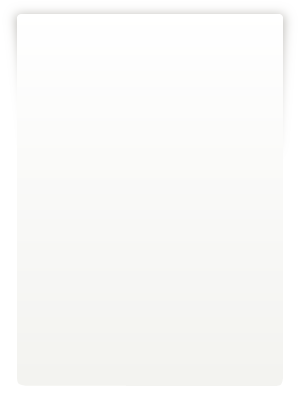
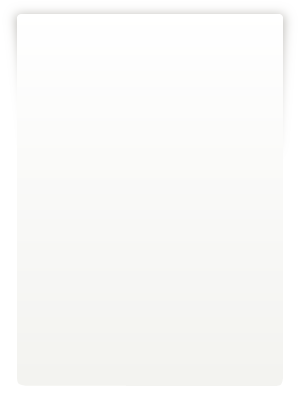
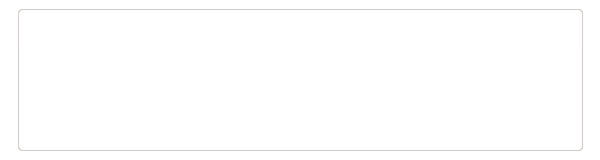
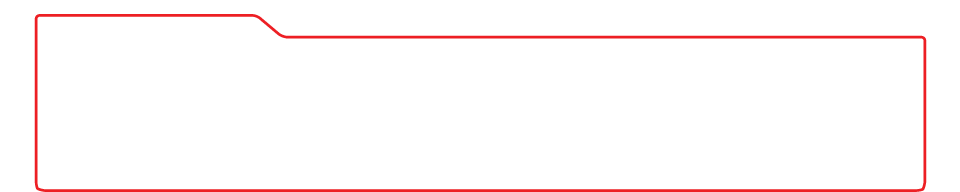
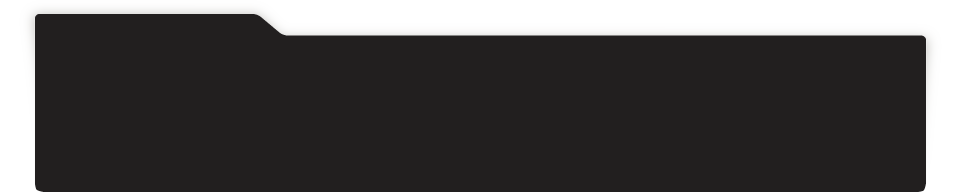
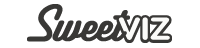
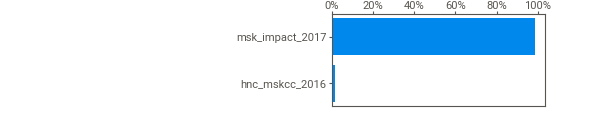
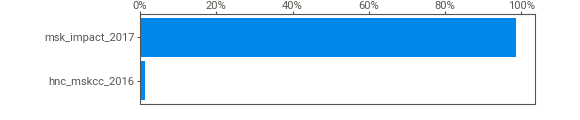
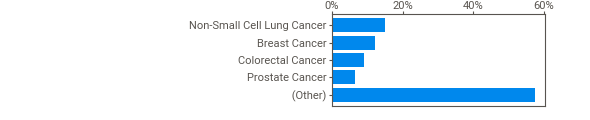
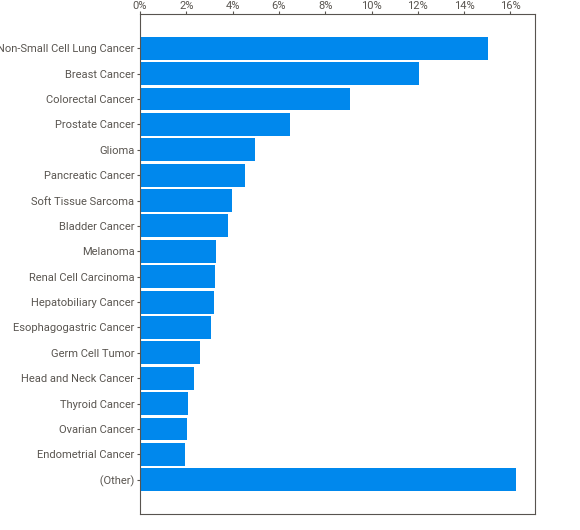
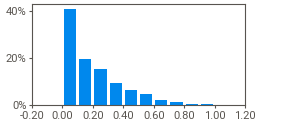
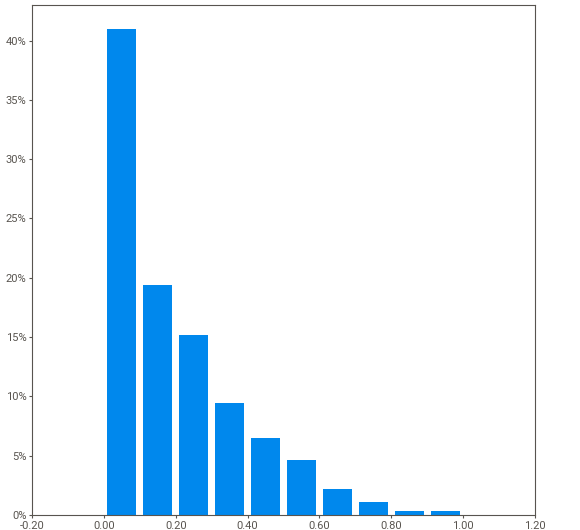
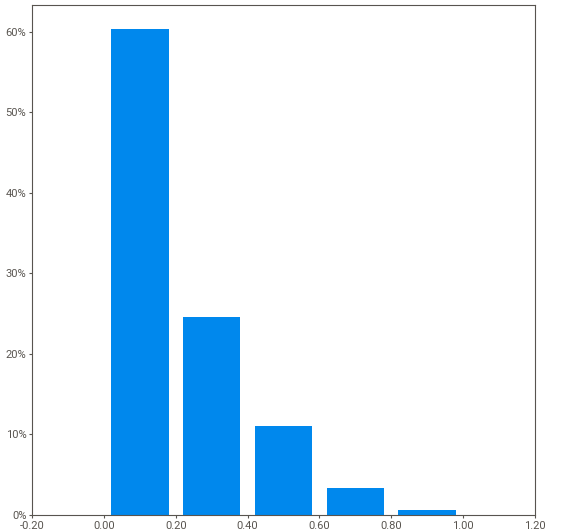
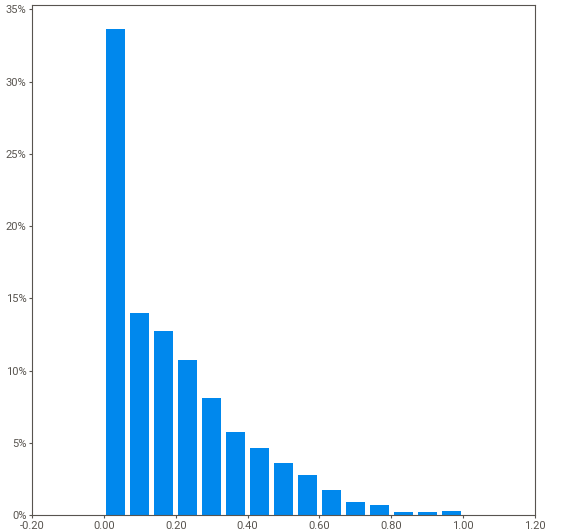
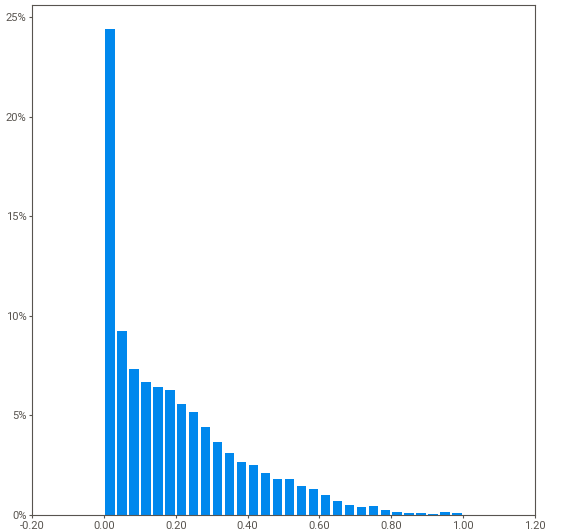
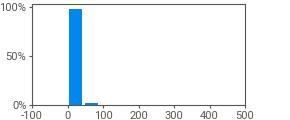
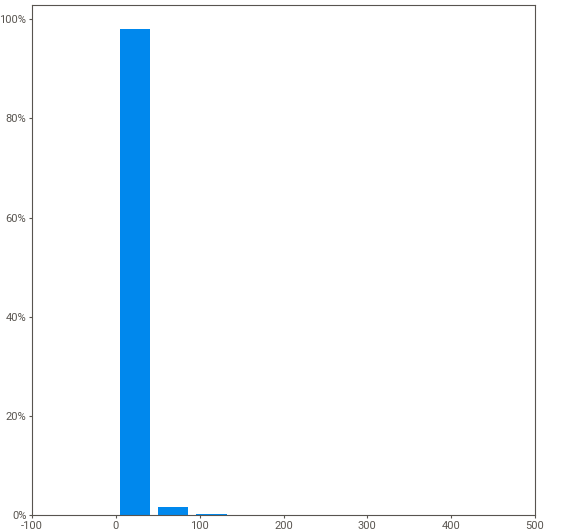
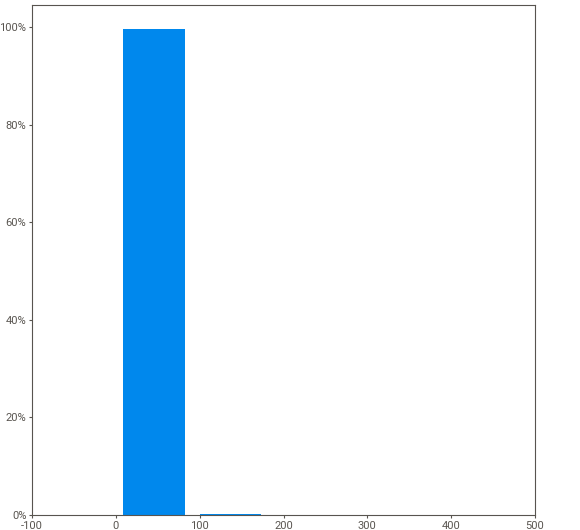
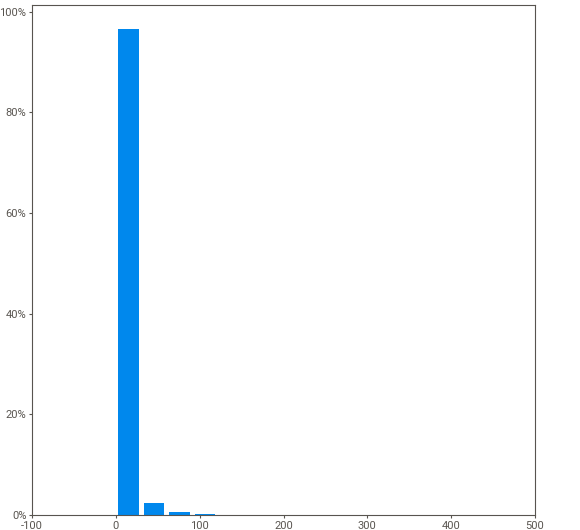
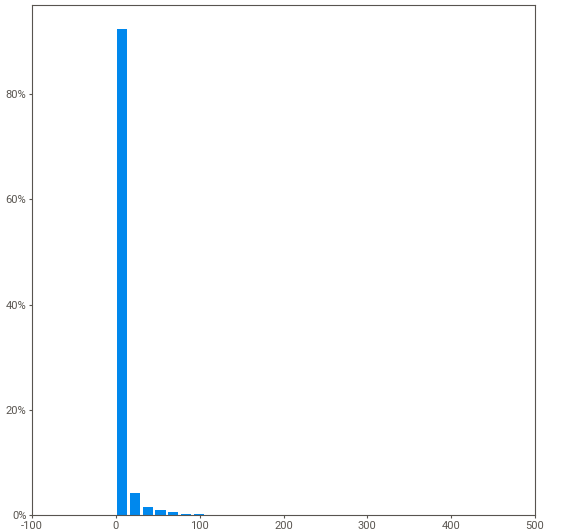
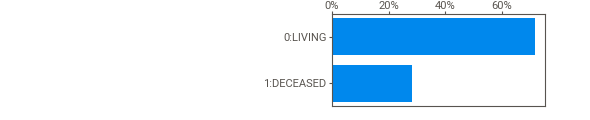
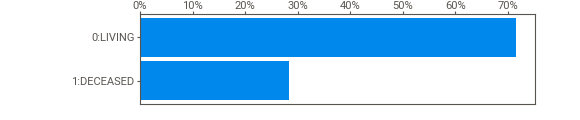
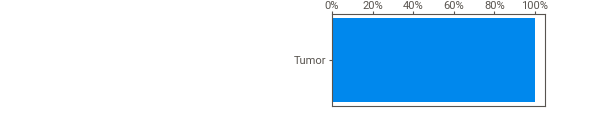
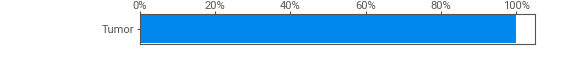
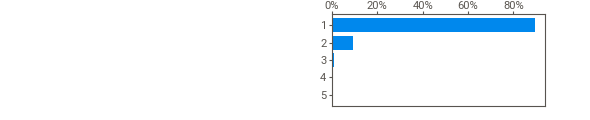
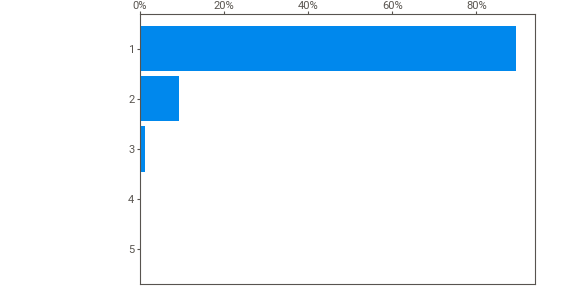
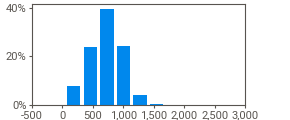
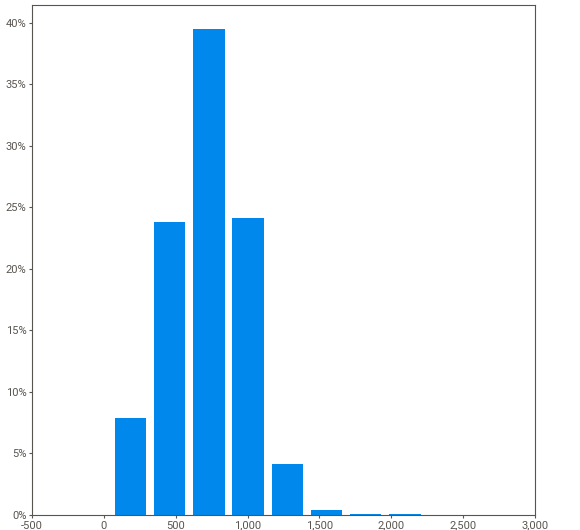
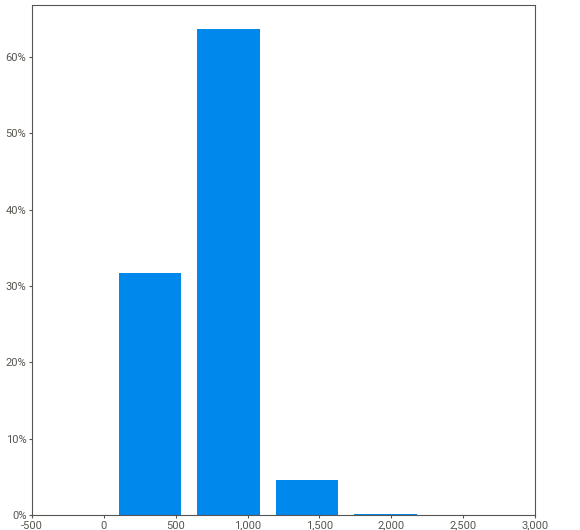
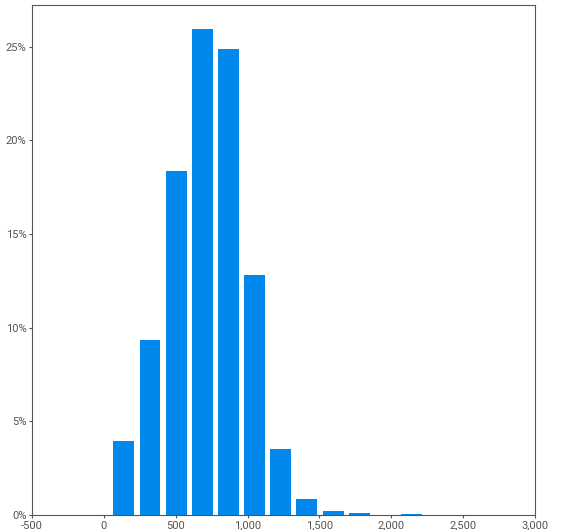
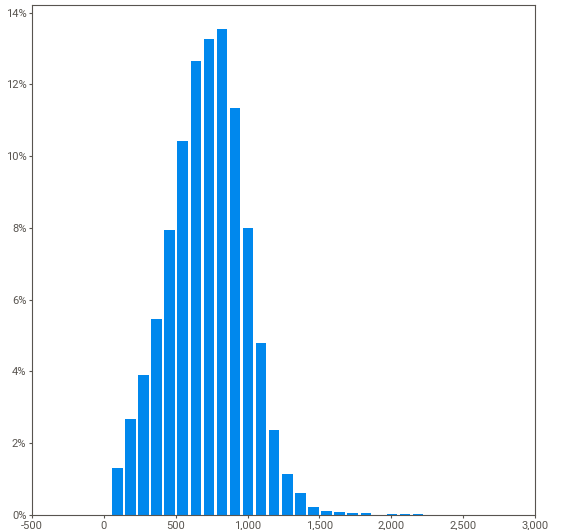
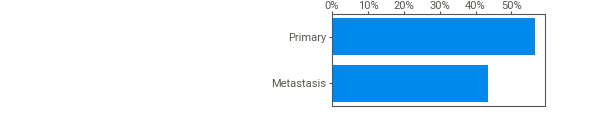
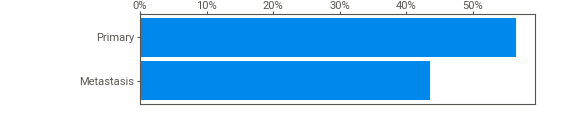
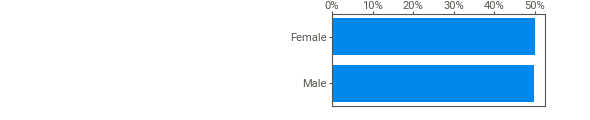
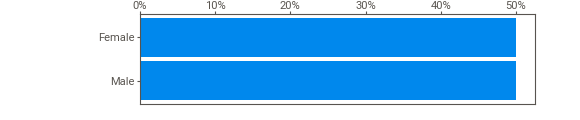
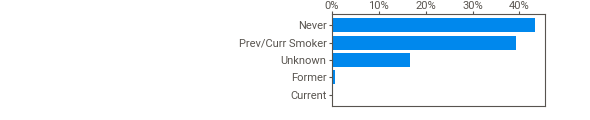
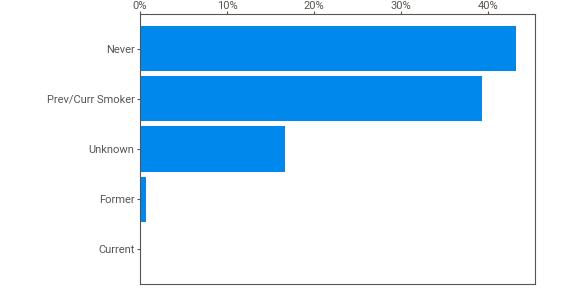
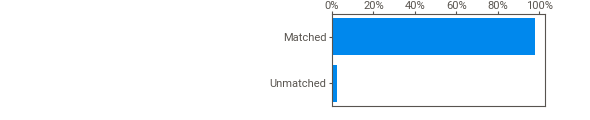
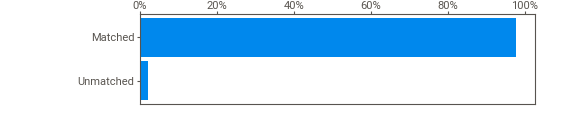
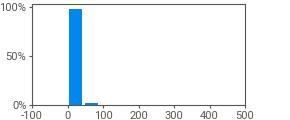
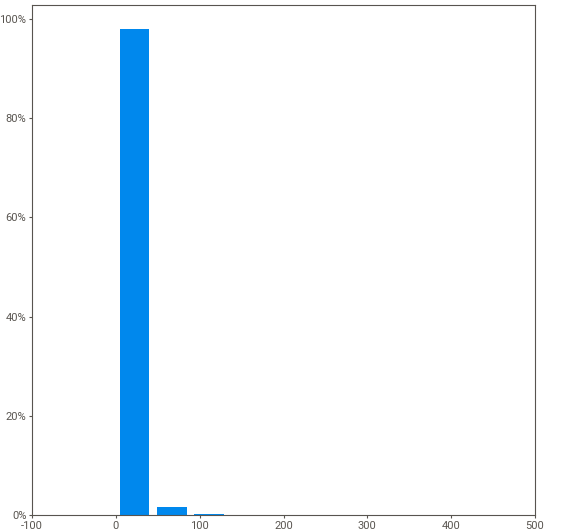
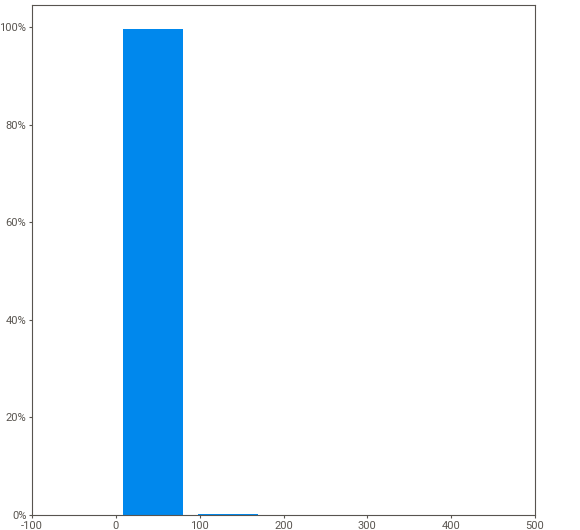
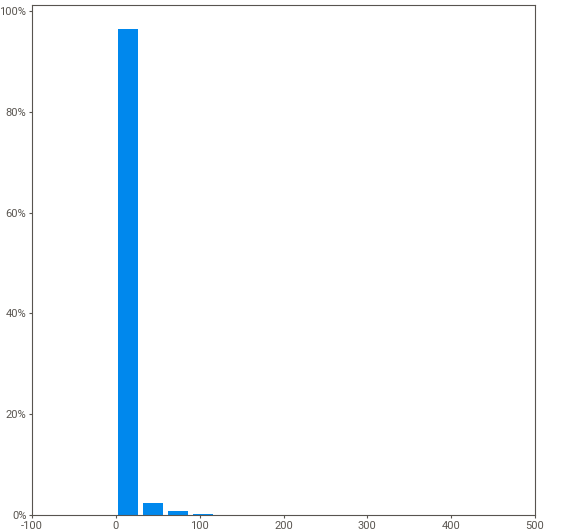
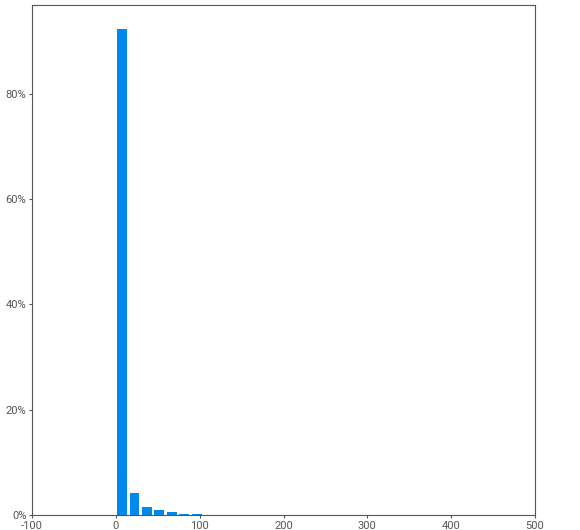
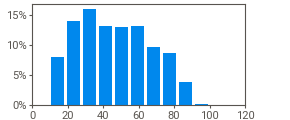
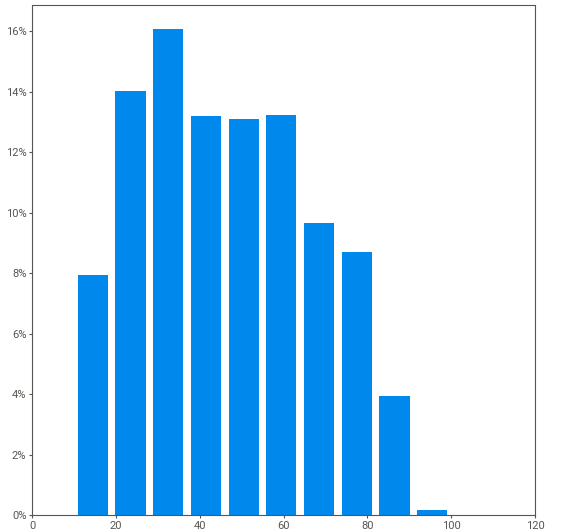
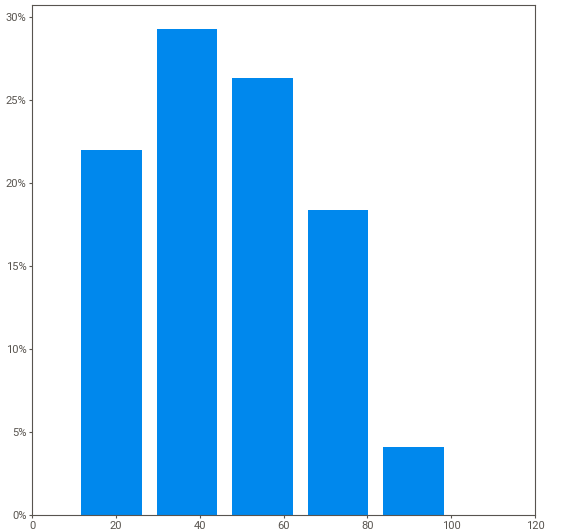
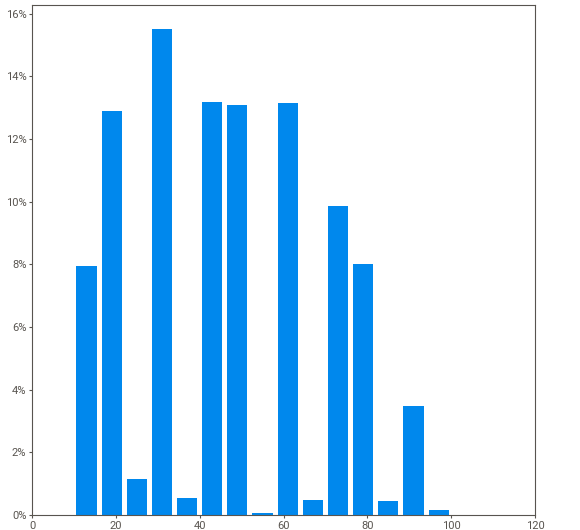
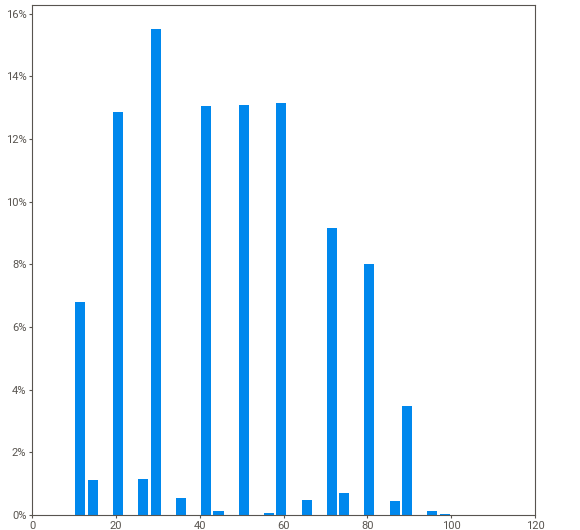
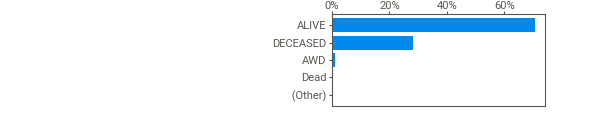
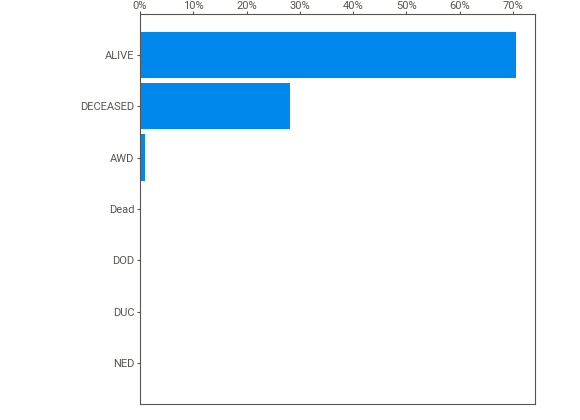
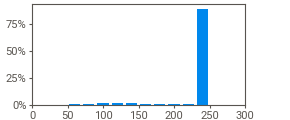
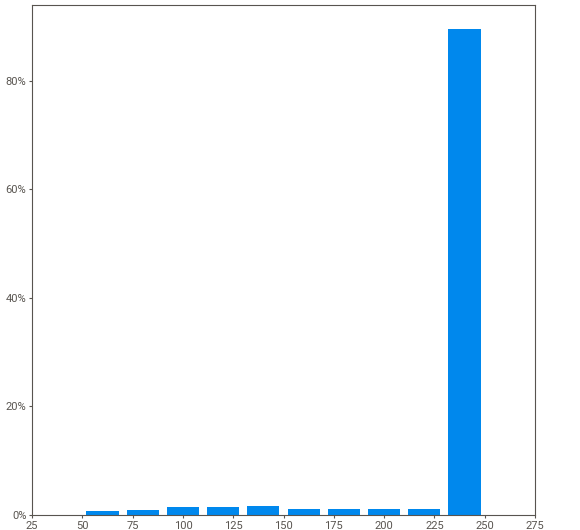
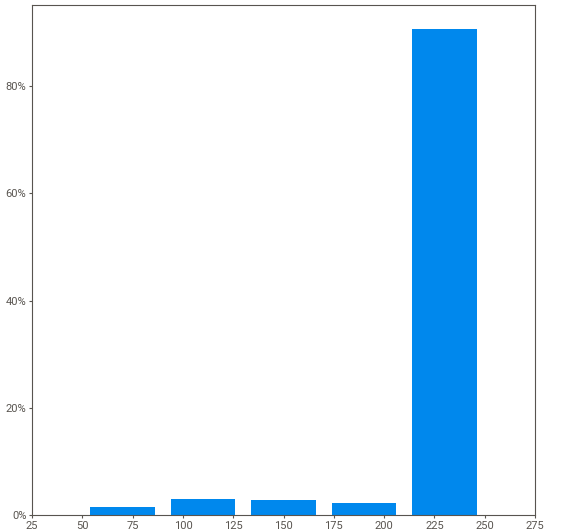
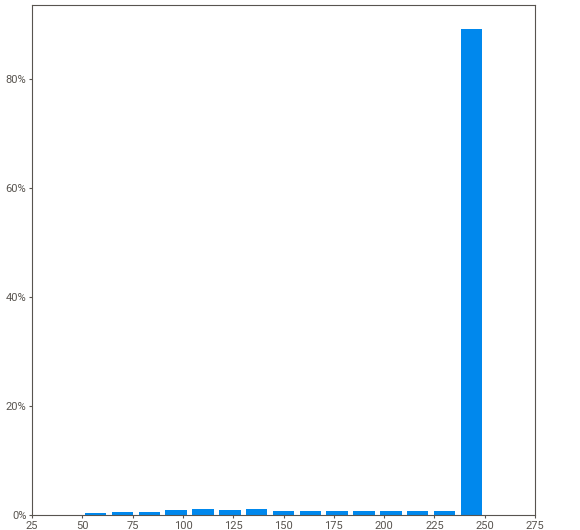
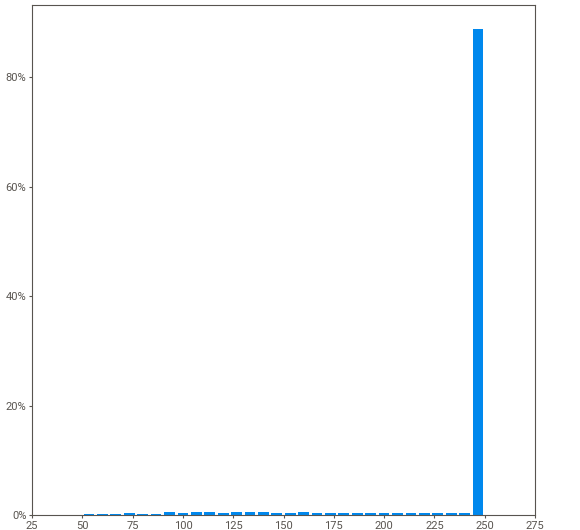
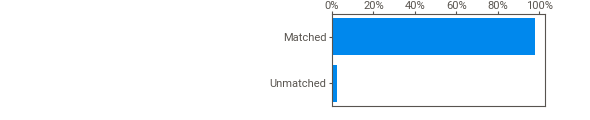
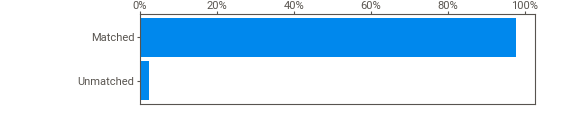
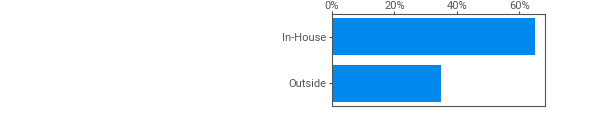
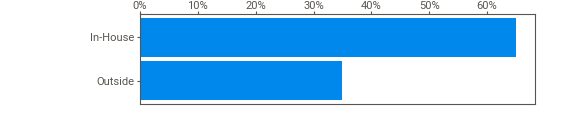
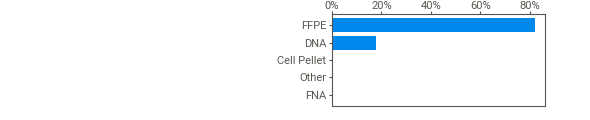
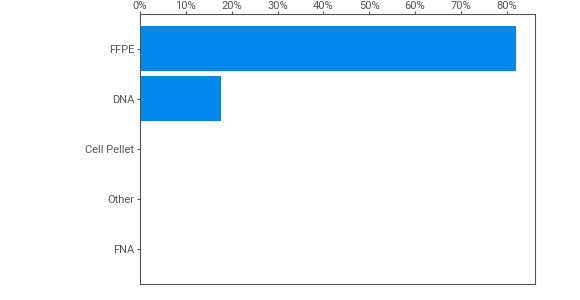
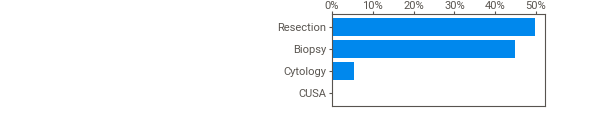
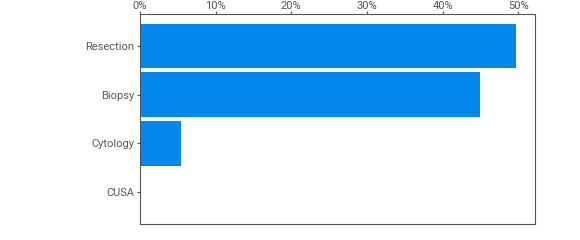
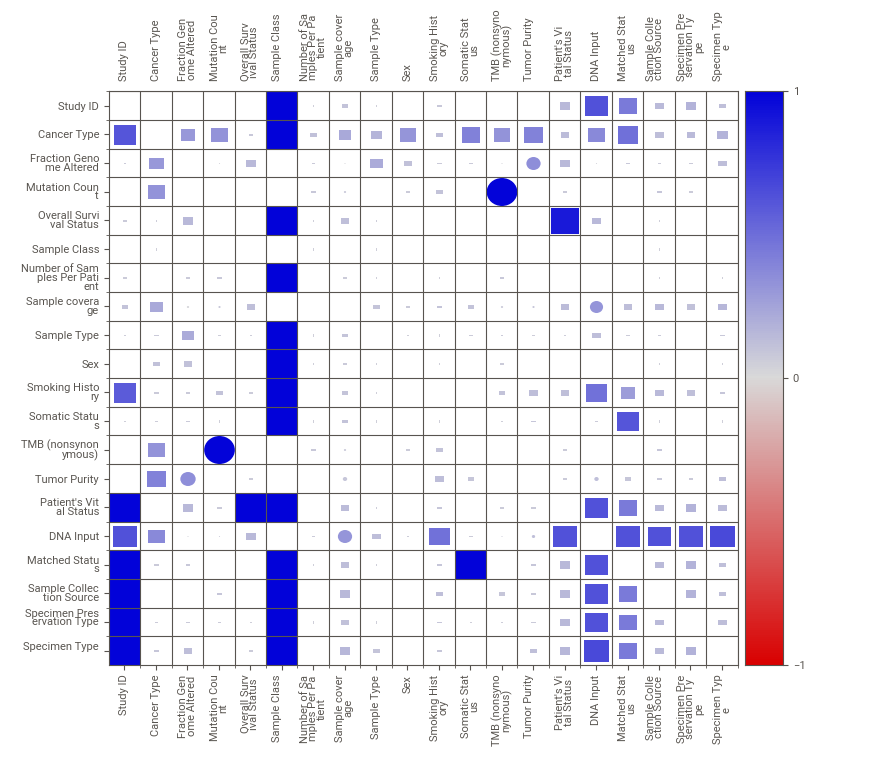
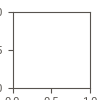

In [8]:
report.show_notebook()

In [9]:
# would like to study the relationship among the amount of mutation with the tissue of 
# origin of the cancer
df=df[cols]
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Cancer Type',
       'Cancer Type Detailed', 'Fraction Genome Altered', 'Mutation Count',
       'Oncotree Code', 'Overall Survival Status', 'Primary Tumor Site',
       'Sample Class', 'Number of Samples Per Patient', 'Sample coverage',
       'Sample Type', 'Sex', 'Smoking History', 'Somatic Status',
       'TMB (nonsynonymous)', 'Tumor Purity', 'Patient's Vital Status',
       'DNA Input', 'Matched Status', 'Sample Collection Source',
       'Specimen Preservation Type', 'Specimen Type'],
      dtype='object')

In [10]:
# Let's explore the relation among amount of mutation and number of cases
df1 = df\
    .groupby(['Primary Tumor Site'])\
    .agg({'Mutation Count': 'mean',
         'Study ID': 'count'})\
    .rename(columns={'Study ID': 'NumCases'})

df1[df1['NumCases']>10]\
    .sort_values(by='Mutation Count', ascending=False)\
    .reset_index()\
    [:30]


,Primary Tumor Site,Mutation Count,NumCases
0,Skin,22.323353,334
1,Cecum,21.517986,139
2,Upper Tract,21.261905,84
3,Scalp,19.866667,15
4,Transverse Colon,19.725275,91
5,Ascending Colon,18.645455,110
6,Duodenum,15.904762,21
7,Uterus,13.063291,316
8,Bladder,12.821429,336
9,Cancer of Unknown Primary,12.754545,220


In [11]:
"""
This table shows how the cancers with most mutations with minimum 10 cases belongs to 
tissues with exposition to the exterior (lungs, skin) or presents biome (Gastroinstestinal 
tractum, bladder, uterus).
The brain appears as an exception in the position 18.
"""


'\nThis table shows how the cancers with most mutations with minimum 10 cases belongs to \ntissues with exposition to the exterior (lungs, skin) or presents biome (Gastroinstestinal \ntractum, bladder, uterus).\nThe brain appears as an exception in the position 18.\n'

In [45]:
# See the most commons cancer types to see if the exterior or biome presence is relevant

df1 = df\
    .groupby(['Primary Tumor Site'])\
    .agg({'Mutation Count': 'mean',
         'Study ID': 'count'})\
    .rename(columns={'Study ID': 'NumCases'})

df2 = df1[df1['NumCases']>10]\
    .sort_values(by='NumCases', ascending=False)\
    .reset_index()


df_mutations_all = df2.copy()

df2[:30]


,Primary Tumor Site,Mutation Count,NumCases
0,Lung,7.928652,1780
1,Breast,4.843079,1351
2,Prostate,3.318436,716
3,Brain,7.668277,621
4,Pancreas,4.314563,515
5,Kidney,3.710027,369
6,Bladder,12.821429,336
7,Skin,22.323353,334
8,Uterus,13.063291,316
9,Sigmoid Colon,9.284672,274


In [13]:
# lets aggeregate the different cancer of GI tract.. see as has the word colon in it.
colons = [i for i in df2['Primary Tumor Site'] if 'colon' in i.lower()]
df2[df2['Primary Tumor Site'].isin(colons)].sum()

Primary Tumor Site    Sigmoid ColonAscending ColonRectosigmoid Colon...
Mutation Count                                                 74.09309
NumCases                                                            641
dtype: object

In [14]:
"""
Those Colon related cases would be the number 4º in amount of cases with 641 cases, 
being above the brain cases
"""

'\nThose Colon related cases would be the number 4º in amount of cases with 641 cases, \nbeing above the brain cases\n'

In [15]:
df.sample(5).T

,5079,8629,7645,8772,9832
Study ID,msk_impact_2017,msk_impact_2017,msk_impact_2017,msk_impact_2017,msk_impact_2017
Patient ID,P-0005053,P-0009003,P-0007787,P-0009174,P-0010489
Sample ID,P-0005053-T01-IM5,P-0009003-T01-IM5,P-0007787-T01-IM5,P-0009174-T01-IM5,P-0010489-T01-IM5
Cancer Type,Melanoma,"Skin Cancer, Non-Melanoma",Hepatobiliary Cancer,Salivary Gland Cancer,Non-Hodgkin Lymphoma
Cancer Type Detailed,Cutaneous Melanoma,Sebaceous Carcinoma,Hepatocellular Carcinoma,Adenoid Cystic Carcinoma,Non-Hodgkin Lymphoma
Fraction Genome Altered,0.0493,0.0776,0.0088,0.0169,0.0213
Mutation Count,13.0,17.0,5.0,3.0,5.0
Oncotree Code,SKCM,SEBA,HCC,ACYC,NHL
Overall Survival Status,0:LIVING,0:LIVING,1:DECEASED,0:LIVING,0:LIVING
Primary Tumor Site,Skin,Scalp,Liver,Oropharynx,Lymph node


In [16]:
df.groupby('Sample Type').mean()

/tmp/ipykernel_18809/1842479495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sample Type').mean()


,Fraction Genome Altered,Mutation Count,Number of Samples Per Patient,Sample coverage,TMB (nonsynonymous),Tumor Purity,DNA Input
Sample Type,,,,,,,
Metastasis,0.231820,7.408855,1.144840,731.707211,7.352968,46.242655,235.660597
Primary,0.165482,7.003990,1.099362,703.390750,6.851702,45.208638,240.835383


In [27]:
df[df['Mutation Count']==0].shape, df.shape, 816/11096

((816, 25), (11096, 25), 0.07354001441961067)

### Mutation count ==0

Calls the attention because the actual models opf cancer assume the cancer is produced by the mutation of cells; maybe i do not understand this variable, or the mutation is not detetable by the current methods... accounting for a 7% of the sample.

In [25]:
df[df['Mutation Count']==0].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Study ID,816,1,msk_impact_2017,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient ID,816,796,P-0007647,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sample ID,816,816,P-0000053-T01-IM3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancer Type,816,48,Soft Tissue Sarcoma,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cancer Type Detailed,816,184,Prostate Adenocarcinoma,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fraction Genome Altered,814.0,NaN,NaN,NaN,0.131367,0.176604,0.0,0.0042,0.0576,0.197775,0.974
Mutation Count,816.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oncotree Code,816,190,PRAD,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Survival Status,816,2,0:LIVING,661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Tumor Site,805,89,Prostate,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
"""
- Most of patioents are males, and among them the prostate cancer is prevalent, 
- 19% of are alive, compare to the mediam of 25%. Not so notorious.
"""

'\n- Most of patioents are males, and among them the prostate cancer is prevalent, \n- 19% of are alive, compare to the mediam of 25%. Not so notorious.\n'

In [32]:

df[((df['Mutation Count']==0))]['Cancer Type Detailed'].value_counts()[:10]

Prostate Adenocarcinoma             92
Mixed Germ Cell Tumor               44
Lung Adenocarcinoma                 38
Breast Invasive Ductal Carcinoma    35
Neuroblastoma                       29
Merkel Cell Carcinoma               28
Dedifferentiated Liposarcoma        26
Ewing Sarcoma                       21
Seminoma                            18
Synovial Sarcoma                    15
Name: Cancer Type Detailed, dtype: int64

/tmp/ipykernel_18809/3760412913.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

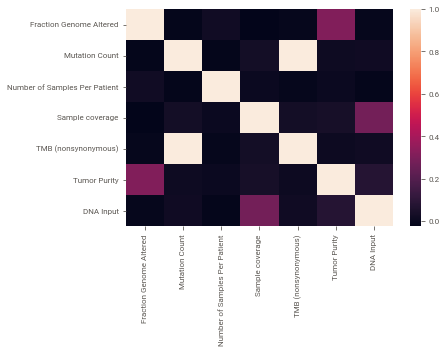

In [35]:
# df.corr()

# import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [49]:
#tumor mortality
df1 = df[df['Overall Survival Status']=='1:DECEASED']\
    .groupby(['Primary Tumor Site'])\
    .agg({'Mutation Count': 'mean',
          'Study ID': 'count'})\
    .rename(columns={'Study ID': 'NumCases'})

df2 = df1[df1['NumCases']>10]\
    .sort_values(by='NumCases', ascending=False)\
    .reset_index()
    
df2[:30]

,Primary Tumor Site,Mutation Count,NumCases
0,Lung,8.551783,589
1,Breast,4.652542,354
2,Brain,12.045161,155
3,Pancreas,4.471429,140
4,Uterus,6.610687,131
5,Prostate,5.186047,129
6,Liver,3.801802,111
7,Skin,23.202020,99
8,Ovary,4.021505,93
9,Stomach,3.593407,91


In [50]:
print('Number of deceased patients in the study: ', df1.sum().sum())

Number of deceased patients in the study:  3826.1116616420422


In [56]:
df_mutations = df_mutations_all.merge(df2, 
                                      on='Primary Tumor Site', 
                                      how = 'inner',
                                     suffixes = ('_all', '_mortal'))
df_mutations['diff_mutations'] = df_mutations['Mutation Count_mortal'] - \
                            df_mutations['Mutation Count_all']

In [61]:
df_mutations[['Primary Tumor Site', 'diff_mutations', 'NumCases_mortal']][:30]


,Primary Tumor Site,diff_mutations,NumCases_mortal
0,Lung,0.623131,589
1,Breast,-0.190537,354
2,Prostate,1.867611,129
3,Brain,4.376884,155
4,Pancreas,0.156865,140
5,Kidney,-0.088076,82
6,Bladder,-3.003247,88
7,Skin,0.878667,99
8,Uterus,-6.452604,131
9,Sigmoid Colon,-2.710597,54


### Conclusions:
- The cases woth more mutations are related to exposed tissue, meanning: gastro-intestinal tract, lungs, skin, and biome related ones like uterus, blase.
- There are tumor without mutation count; if true this contradicts the currents theories about formation of cancer, or are a missinterpretation of the data
- Seems possible than among more mutations more dangerous is the tumar in terms of mortality
- There are a strong correlation among the TMB indicator and the number of mutations.
